This notebook will explore how K Means can be used to organize the color variations into their respective color clusters, which can then be used to compress image color.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# conda install scikit-image # require installation
from skimage import io
%matplotlib inline

from sklearn.cluster import KMeans

In [4]:
url = "forest.jpg"
image = io.imread(url)

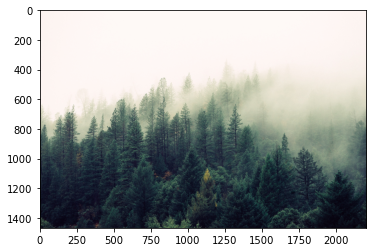

In [5]:
plt.imshow(image)

In [6]:
# checking shape of the image
image.shape

(1467, 2200, 3)

In [9]:
# The red, green and blue use 8 bits each, which have integer values from 0 to 255.
# Rescaling colors down into 0..1 scale
image_scaled = image / 255.0
image_scaled = image_scaled.reshape((-1,3))
image_scaled.shape

(3227400, 3)

In [11]:
# Initializing K Means with 4 clusters
num_clusters = 4
model = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)

In [12]:
# Fitting K Means
model.fit(image_scaled.astype(np.float32))

KMeans(n_clusters=4)

In [13]:
# store centroids, labels and inertia for all our four clusters

# x,y coordinates of cluster centers
centroids = model.cluster_centers_
# labels of each clusters
labels = model.labels_
# sum of squared distance from each point to the corresponding cluster
inertia = model.inertia_

In [17]:
print('centroids: ', centroids)
print('labels: ', np.unique(labels))
print('inertia: ', inertia)

centroids:  [[0.08876482 0.12903145 0.17647326]
 [0.9799992  0.9533148  0.9323596 ]
 [0.28635466 0.37209117 0.3558085 ]
 [0.67407805 0.70897895 0.61737007]]
labels:  [0 1 2 3]
inertia:  36793.6796875


In [18]:
new_colors = centroids[labels].reshape((-1,3))
image_compressed = new_colors.reshape(image.shape)

Text(0.5, 1.0, '4 Color Image')

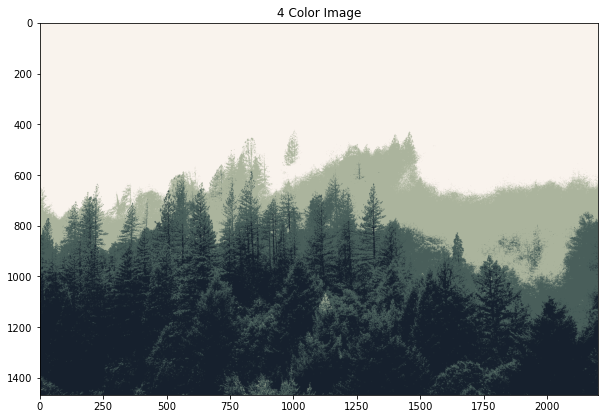

In [19]:
plt.figure(figsize = (10,10))
plt.imshow(image_compressed)
plt.title('4 Color Image')